Import Libraries

In [1]:
import keras
import numpy as np 
import pandas as pd 
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
import os
import torch
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import Subset
from sklearn.model_selection import train_test_split
from torchvision.transforms import Compose, ToTensor, Resize
from torch.utils.data import DataLoader
from torch.nn.functional import normalize
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from keras_preprocessing.image import img_to_array
from keras_preprocessing.image import load_img
import time

Mounting data from google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Navigating to data folder

In [3]:
%cd drive/My Drive
%cd UTA/5334/ImageClassifier

/content/drive/My Drive
/content/drive/My Drive/UTA/5334/ImageClassifier


In [4]:
# This Block of code has been used from url mentioned below and modified as per my use in the project
# [1] Reference: (https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py)
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

def show_Training_info(dataloaders):
  # get some random training images
  dataiter = iter(dataloaders['train']) # Modification to map dataloader
  images, labels = next(dataiter)

  # show images
  imshow(torchvision.utils.make_grid(images))
  # print labels
  print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [5]:
# This Block of code has been used from url marked as [1] mentioned below and modified as per my use in the project is marked as [1]**
# [1] Reference: (https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py)
from numpy.ma.core import nomask
class BaseNet(nn.Module): #[1]
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 3)
        self.pool = nn.AdaptiveAvgPool2d(3)
        self.conv2 = nn.Conv2d(6, 12, 3)
        self.fc1 = nn.Linear(12 * 3 * 3, 240)
        self.fc2 = nn.Linear(240, 120)
        self.fc3 = nn.Linear(120, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class Model1Net(nn.Module): #[1]**
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 6) # Modification to Hyper-Parameters 
        self.pool = nn.AdaptiveAvgPool2d(6)
        self.conv2 = nn.Conv2d(16, 32, 6) # Modification to Hyper-Parameters
        self.fc1 = nn.Linear(32 * 6 * 6, 120) # Modification to Hyper-Parameters
        self.fc2 = nn.Linear(120, 60) # Modification to Hyper-Parameters
        self.fc3 = nn.Linear(60, 10) # Modification to Hyper-Parameters

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class Model2Net(nn.Module): #[1]**
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 6) # Modification to Hyper-Parameters 
        self.pool = nn.AdaptiveAvgPool2d(6)
        self.conv2 = nn.Conv2d(6, 12, 6) # Modification to Hyper-Parameters
        self.conv3 = nn.Conv2d(12, 24, 6) # Modification to Hyper-Parameters
        self.conv4 = nn.Conv2d(24, 48, 6) # Modification to Hyper-Parameters
        self.conv5 = nn.Conv2d(48, 96, 6) # Modification to Hyper-Parameters
        self.fc1 = nn.Linear(96 * 6 * 6, 160) # Modification to Hyper-Parameters
        self.fc2 = nn.Linear(160, 60) # Modification to Hyper-Parameters
        self.fc3 = nn.Linear(60, 10) # Modification to Hyper-Parameters

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = self.pool(F.relu(self.conv5(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class Model3Net(nn.Module): #[1]**
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 6) # Modification to Hyper-Parameters 
        self.pool = nn.AdaptiveAvgPool2d(6) # Modification 
        self.conv2 = nn.Conv2d(6, 12, 6) # Modification to Hyper-Parameters
        self.conv3 = nn.Conv2d(12, 24, 6) # Modification to Hyper-Parameters
        self.conv4 = nn.Conv2d(24, 48, 6) # Addition of layer
        self.conv5 = nn.Conv2d(48, 96, 6) # Addition of layer
        self.conv6 = nn.Conv2d(96, 192, 6) # Addition of layer
        self.conv7 = nn.Conv2d(192, 384, 6) # Addition of layer
        self.conv8 = nn.Conv2d(384, 768, 6) # Addition of layer
        self.fc1 = nn.Linear(768 * 6 * 6, 512) # Modification to Hyper-Parameters
        self.fc2 = nn.Linear(512, 256) # Modification to Hyper-Parameters
        self.fc3 = nn.Linear(256, 128) # Modification to Hyper-Parameters
        self.fc4 = nn.Linear(128, 10) # Addition of layer

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = self.pool(F.relu(self.conv5(x)))
        x = self.pool(F.relu(self.conv6(x)))
        x = self.pool(F.relu(self.conv7(x)))
        x = self.pool(F.relu(self.conv8(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x)) # Modification 
        x = self.fc4(x)
        return x

''' train_model() is using basic code template used in reference [1], I have modified it take values as parameters like, 
no - counter
optim_val - select Optimizer - SGD or Adam
learningRate  - learningRate for optimizer
epochs - number of epochs
net - Four models used here
dataloaders - Dataset 
'''
# Referenced code is marked as [1] at the start and end
# Modeified block is marked as [1]**
def train_model(no,optim_val,learningRate,epochs,net,dataloaders): ## Custom code to select optimizer and learning rate and start time of training model
  criterion = nn.CrossEntropyLoss()
  #lets use different optimizers like SGD and Adam
  if optim_val == "SGD":
    optimizer = optim.SGD(net.parameters(), lr=float(learningRate), momentum=0.9)
  elif optim_val == "ADAM":
    optimizer = optim.Adam(net.parameters(), lr=float(learningRate))

  starttime = "model"+str(no)+"starttime"
  endtime = "model"+str(no)+"endtime"
  modeltime = "model"+str(no)+"trainingtime"
  starttime = time.time() # Custom code ends here
  # let's run for n epochs 
  for epoch in range(epochs):  # [1]Start 

      running_loss = 0.0
      for i, data in enumerate(dataloaders['train'], 0): # Modification to map dataloader
          # get the inputs; data is a list of [inputs, labels]
          inputs, labels = data

          # zero the parameter gradients
          optimizer.zero_grad()

          # forward + backward + optimize
          outputs = net(inputs) # Modification to map to Model 1 
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          # print statistics
          running_loss += loss.item()
          if i % 100 == 99:    # print every 100 mini-batches
              print(f'[epoch : {epoch + 1}, mini-batches : {i + 1:5d}] loss: {running_loss / 100:.3f}') #modified code 
              running_loss = 0.0 #[1]End
  # Custom code to calculate trining time of model
  endtime = time.time()
  modeltime = endtime-starttime
  print('Finished Training Model ',no)
  print('Training Time for Model',no,' :',modeltime)
  print('==========================================')
  model_accuracy = "model"+str(no)+"accuracy"
  # Custom code ends here
  # [1] Start
  correct = 0
  total = 0
  # since we're not training, we don't need to calculate the gradients for our outputs
  with torch.no_grad():
      for data in dataloaders['val']: # Modification to map dataloader
          images, labels = data
          # calculate outputs by running images through the network
          outputs = net(images)
          # the class with the highest energy is what we choose as prediction
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
  model_accuracy = 100 * correct // total
  print("Accuracy of the ",no," Network on the validation images:", model_accuracy ,'%')
  correct_pred = {classname: 0 for classname in classes}
  total_pred = {classname: 0 for classname in classes}
  print('==========================================')
  # again no gradients needed
  with torch.no_grad():
      for data in dataloaders['val']: # Modification to map dataloader
          images, labels = data
          outputs = net(images)
          _, predictions = torch.max(outputs, 1)
          # collect the correct predictions for each class
          for label, prediction in zip(labels, predictions):
              if label == prediction:
                  correct_pred[classes[label]] += 1
              total_pred[classes[label]] += 1
  # [1] End
  # [1]** Start modification done to plot bar graph 
  print("=============Plot graph for model ",no,"=============")
  plt.figure()
  # print accuracy for each class
  for classname, correct_count in correct_pred.items():
      class_accuracy = 100 * float(correct_count) / total_pred[classname]
      print(f'Accuracy for class: {classname:5s} is {class_accuracy:.1f} %')
      # Plot graph for each class Airplane, Motorbikes, Schooner

      plt.title("Model Perdiction Accuracy for each class")
      plt.xlabel("Class")
      plt.ylabel("Accuracy")
      plt.bar(classname, class_accuracy)
  plt.show()
  print('==========================================')
  return [modeltime,model_accuracy]
  # [1]** End 

Plot graph for accuracy of models and their training time 

In [6]:
# Custom code to Plot graph for all the models and training run time
def plot_graph(modelresult):
  print("Model Accuracy Graph")
  model = ["Model 0","Model 1","Model 2","Model 3"]
  plt.figure()
  for acc in range(len(modelresult)):
    plt.title("Model Perdiction Accuracy")
    plt.xlabel("Model")
    plt.ylabel("Accuracy")
    plt.bar(model[acc], modelresult[acc][1])
  plt.show()
  print("Model Run Time Graph")
  plt.figure()
  for acc in range(len(modelresult)):
    plt.title("Model Training Run Time")
    plt.xlabel("Model")
    plt.ylabel("Accuracy")
    plt.bar(model[acc], modelresult[acc][0])
  plt.show()

The Training and validation set is split in Ratio 80:20

In [7]:
# This block of code is used from the reference [2], I have modified it to make functions and call them accordingly in different function.
# [2] Reference : (https://discuss.pytorch.org/t/how-to-split-dataset-into-test-and-validation-sets/33987/4)
def train_val_dataset(dataset, val_split=0.20):
    train_idx, val_idx = train_test_split(list(range(len(dataset))), test_size=val_split)
    datasets = {}
    datasets['train'] = Subset(dataset, train_idx)
    datasets['val'] = Subset(dataset, val_idx)
    return datasets
    
def create_aug_dataset(datasetFolder,augmentationList):
  dataset = ImageFolder(datasetFolder,transform=Compose(augmentationList))
  return dataset

img_data_dir:  caltech101_classification
Total Number of Images of different class:
# of Airplane: 800
# of Motorbikes: 798
# of Schooner: 63
=============Iteration  0 =============
Augmentation Iteration 0 Image Augmentation parameters [Resize(size=(240, 240), interpolation=bilinear, max_size=None, antialias=None), ToTensor()]
Total Number of Images 1661
Total Number of Images in Training Dataset  1328
Total Number of Images in Validation Dataset  333
Dataset Information  Dataset ImageFolder
    Number of datapoints: 1661
    Root location: caltech101_classification
    StandardTransform
Transform: Compose(
               Resize(size=(240, 240), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
           )
torch.Size([6, 3, 240, 240]) torch.Size([6])
('Motorbikes', 'airplanes', 'schooner')


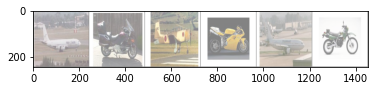

airplanes Motorbikes airplanes Motorbikes airplanes Motorbikes
[epoch : 1, mini-batches :   100] loss: 1.141
[epoch : 1, mini-batches :   200] loss: 0.869
[epoch : 2, mini-batches :   100] loss: 0.599
[epoch : 2, mini-batches :   200] loss: 0.455
Finished Training Model  0
Training Time for Model 0  : 51.16920018196106
Accuracy of the  0  Network on the validation images: 86 %
=============Plot graph for model  0 =============
Accuracy for class: Motorbikes is 83.0 %
Accuracy for class: airplanes is 96.3 %
Accuracy for class: schooner is 0.0 %


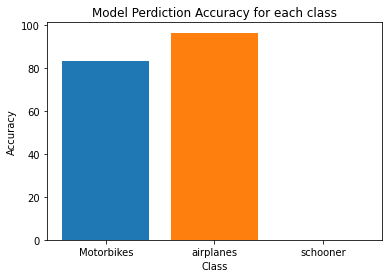

[epoch : 1, mini-batches :   100] loss: 1.061
[epoch : 1, mini-batches :   200] loss: 0.585
[epoch : 2, mini-batches :   100] loss: 0.380
[epoch : 2, mini-batches :   200] loss: 0.378
Finished Training Model  1
Training Time for Model 1  : 45.64894127845764
Accuracy of the  1  Network on the validation images: 81 %
=============Plot graph for model  1 =============
Accuracy for class: Motorbikes is 96.2 %
Accuracy for class: airplanes is 71.8 %
Accuracy for class: schooner is 0.0 %


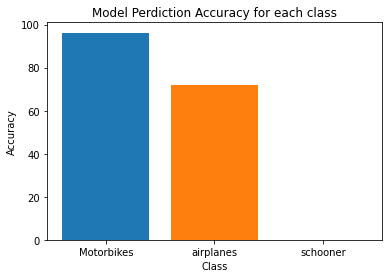

[epoch : 1, mini-batches :   100] loss: 0.977
[epoch : 1, mini-batches :   200] loss: 0.697
[epoch : 2, mini-batches :   100] loss: 0.849
[epoch : 2, mini-batches :   200] loss: 0.852
Finished Training Model  2
Training Time for Model 2  : 34.2151403427124
Accuracy of the  2  Network on the validation images: 47 %
=============Plot graph for model  2 =============
Accuracy for class: Motorbikes is 100.0 %
Accuracy for class: airplanes is 0.0 %
Accuracy for class: schooner is 0.0 %


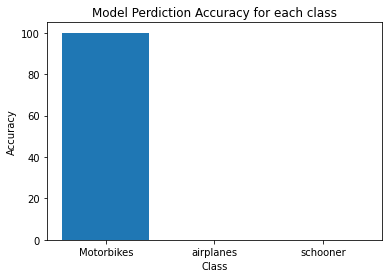

[epoch : 1, mini-batches :   100] loss: 1.071
[epoch : 1, mini-batches :   200] loss: 0.874
[epoch : 2, mini-batches :   100] loss: 0.850
[epoch : 2, mini-batches :   200] loss: 0.880
Finished Training Model  3
Training Time for Model 3  : 183.1270306110382
Accuracy of the  3  Network on the validation images: 47 %
=============Plot graph for model  3 =============
Accuracy for class: Motorbikes is 100.0 %
Accuracy for class: airplanes is 0.0 %
Accuracy for class: schooner is 0.0 %


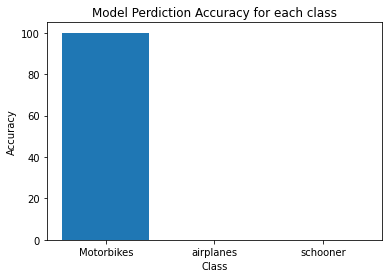

Model Accuracy Graph


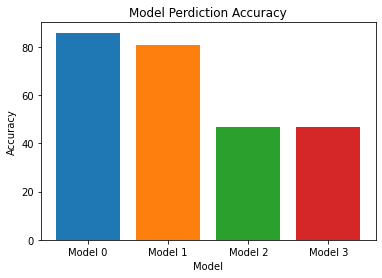

Model Run Time Graph


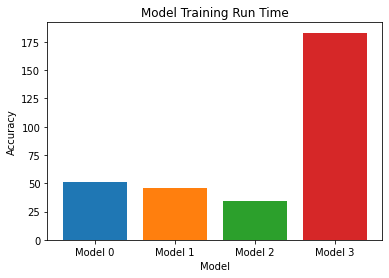

=============Iteration  1 =============
Augmentation Iteration 1 Image Augmentation parameters [Resize(size=(300, 300), interpolation=bilinear, max_size=None, antialias=None), GaussianBlur(kernel_size=(1, 1), sigma=(0.1, 0.5)), RandomRotation(degrees=[-5.0, 5.0], interpolation=nearest, expand=False, fill=0), RandomHorizontalFlip(p=0.5), ToTensor()]
Total Number of Images 1661
Total Number of Images in Training Dataset  1328
Total Number of Images in Validation Dataset  333
Dataset Information  Dataset ImageFolder
    Number of datapoints: 1661
    Root location: caltech101_classification
    StandardTransform
Transform: Compose(
               Resize(size=(300, 300), interpolation=bilinear, max_size=None, antialias=None)
               GaussianBlur(kernel_size=(1, 1), sigma=(0.1, 0.5))
               RandomRotation(degrees=[-5.0, 5.0], interpolation=nearest, expand=False, fill=0)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
torch.Size([6, 3, 300, 30

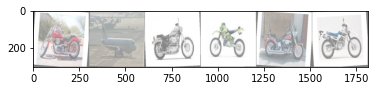

Motorbikes airplanes Motorbikes Motorbikes Motorbikes Motorbikes
[epoch : 1, mini-batches :   100] loss: 1.122
[epoch : 1, mini-batches :   200] loss: 0.641
[epoch : 2, mini-batches :   100] loss: 0.475
[epoch : 2, mini-batches :   200] loss: 0.508
Finished Training Model  0
Training Time for Model 0  : 41.1795015335083
Accuracy of the  0  Network on the validation images: 82 %
=============Plot graph for model  0 =============
Accuracy for class: Motorbikes is 73.1 %
Accuracy for class: airplanes is 98.1 %
Accuracy for class: schooner is 0.0 %


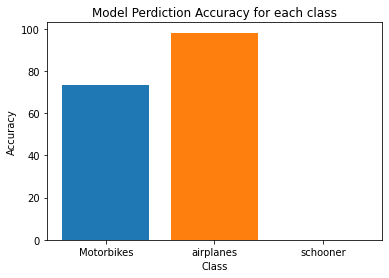

[epoch : 1, mini-batches :   100] loss: 0.819
[epoch : 1, mini-batches :   200] loss: 0.518
[epoch : 2, mini-batches :   100] loss: 0.440
[epoch : 2, mini-batches :   200] loss: 0.388
Finished Training Model  1
Training Time for Model 1  : 78.87123203277588
Accuracy of the  1  Network on the validation images: 91 %
=============Plot graph for model  1 =============
Accuracy for class: Motorbikes is 93.8 %
Accuracy for class: airplanes is 96.3 %
Accuracy for class: schooner is 0.0 %


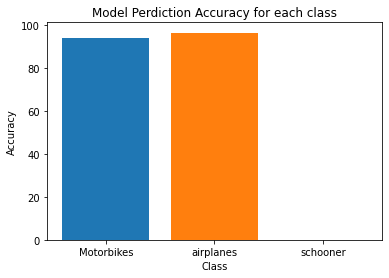

[epoch : 1, mini-batches :   100] loss: 1.015
[epoch : 1, mini-batches :   200] loss: 0.702
[epoch : 2, mini-batches :   100] loss: 0.555
[epoch : 2, mini-batches :   200] loss: 0.468
Finished Training Model  2
Training Time for Model 2  : 60.669975996017456
Accuracy of the  2  Network on the validation images: 90 %
=============Plot graph for model  2 =============
Accuracy for class: Motorbikes is 95.0 %
Accuracy for class: airplanes is 95.0 %
Accuracy for class: schooner is 0.0 %


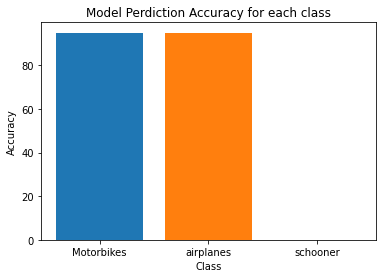

[epoch : 1, mini-batches :   100] loss: 1.047
[epoch : 1, mini-batches :   200] loss: 0.879
[epoch : 2, mini-batches :   100] loss: 0.842
[epoch : 2, mini-batches :   200] loss: 0.844
Finished Training Model  3
Training Time for Model 3  : 208.49237489700317
Accuracy of the  3  Network on the validation images: 48 %
=============Plot graph for model  3 =============
Accuracy for class: Motorbikes is 100.0 %
Accuracy for class: airplanes is 0.0 %
Accuracy for class: schooner is 0.0 %


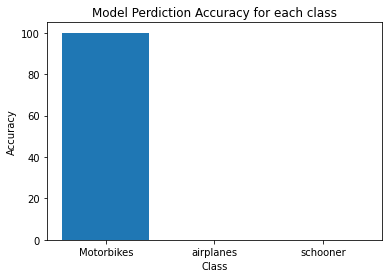

Model Accuracy Graph


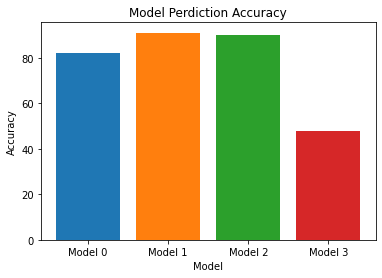

Model Run Time Graph


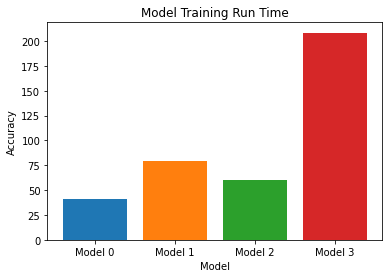

In [8]:
''' 
Custom code to load the data and apply various attributes like
augmentationList - Tranformation parameters of images,
learningRate - learning rate for optimizer
batch_size - batch size
epoch_val - no of epochs

Then pass these attributes to create_aug_dataset() to create dataset and to train_model() for training and validation of model 
Plot accuracy graph for each class along with model and training time graph for all the models
'''
import os
img_data_dir = 'caltech101_classification'
print("img_data_dir: ",img_data_dir)
print("Total Number of Images of different class:")
print("# of Airplane:",len(os.listdir(os.path.join(img_data_dir,'airplanes'))))
print("# of Motorbikes:",len(os.listdir(os.path.join(img_data_dir,'Motorbikes'))))
print("# of Schooner:",len(os.listdir(os.path.join(img_data_dir,'schooner'))))
learningRate = 0.001
batch_size = 10
epoch_val = 5
# sample 1: augmentationList = [transforms.Resize((300,300)),transforms.GaussianBlur(1,sigma=(0.1,0.5)),transforms.RandomRotation(5),transforms.RandomHorizontalFlip(),transforms.ToTensor()]
# sample 2: augmentationList = [Resize((240,240)),ToTensor()]
augmentationList = [[transforms.Resize((240,240)),ToTensor()],[transforms.Resize((300,300)),transforms.GaussianBlur(1,sigma=(0.1,0.5)),transforms.RandomRotation(5),transforms.RandomHorizontalFlip(),transforms.ToTensor()]]

# Take batch size from user
for auglist in range(len(augmentationList)):
  print("=============Iteration ",auglist,"=============")
  print("Augmentation Iteration",auglist,"Image Augmentation parameters",augmentationList[auglist])
  dataset = create_aug_dataset(img_data_dir,augmentationList[auglist])
  print("Total Number of Images",len(dataset))
  datasets = train_val_dataset(dataset)
  print("Total Number of Images in Training Dataset ",len(datasets['train']))
  print("Total Number of Images in Validation Dataset ",len(datasets['val']))
  print("Dataset Information ",datasets['train'].dataset)

  dataloaders = {x:DataLoader(datasets[x],batch_size, shuffle=True) for x in ['train','val']}
  x,y = next(iter(dataloaders['train']))
  print(x.shape, y.shape)

  classes = ('Motorbikes', 'airplanes', 'schooner')
  print(classes)

  accuracy_time_list= list()
  
  show_Training_info(dataloaders)
  nnList = [BaseNet(),Model1Net(),Model2Net(),Model3Net()]
  for n in range(len(nnList)):
    net = nnList[n]
    accuracy_time_list.append(train_model(n,"ADAM",learningRate,epoch_val,net,dataloaders))
  plot_graph(accuracy_time_list)

img_data_dir:  caltech101_classification
Total Number of Images of different class:
# of Airplane: 800
# of Motorbikes: 798
# of Schooner: 63
=============Iteration  0 =============
Augmentation Iteration 0 Image Augmentation parameters [Resize(size=(240, 240), interpolation=bilinear, max_size=None, antialias=None), ToTensor()]
Total Number of Images 1661
Total Number of Images in Training Dataset  1328
Total Number of Images in Validation Dataset  333
Dataset Information  Dataset ImageFolder
    Number of datapoints: 1661
    Root location: caltech101_classification
    StandardTransform
Transform: Compose(
               Resize(size=(240, 240), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
           )
torch.Size([10, 3, 240, 240]) torch.Size([10])
('Motorbikes', 'airplanes', 'schooner')


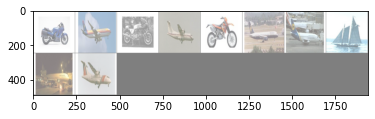

Motorbikes airplanes Motorbikes airplanes Motorbikes airplanes airplanes schooner airplanes airplanes
[epoch : 1, mini-batches :   100] loss: 0.999
[epoch : 2, mini-batches :   100] loss: 0.518
[epoch : 3, mini-batches :   100] loss: 0.472
[epoch : 4, mini-batches :   100] loss: 0.436
[epoch : 5, mini-batches :   100] loss: 0.445
Finished Training Model  0
Training Time for Model 0  : 50.2079963684082
Accuracy of the  0  Network on the validation images: 81 %
=============Plot graph for model  0 =============
Accuracy for class: Motorbikes is 80.6 %
Accuracy for class: airplanes is 89.3 %
Accuracy for class: schooner is 0.0 %


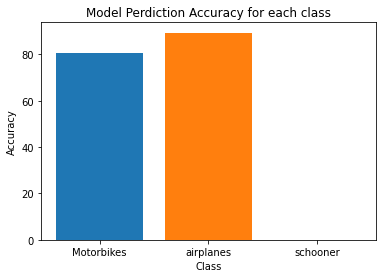

[epoch : 1, mini-batches :   100] loss: 0.825
[epoch : 2, mini-batches :   100] loss: 0.376
[epoch : 3, mini-batches :   100] loss: 0.332
[epoch : 4, mini-batches :   100] loss: 0.277
[epoch : 5, mini-batches :   100] loss: 0.249
Finished Training Model  1
Training Time for Model 1  : 112.01125884056091
Accuracy of the  1  Network on the validation images: 93 %
=============Plot graph for model  1 =============
Accuracy for class: Motorbikes is 93.5 %
Accuracy for class: airplanes is 94.7 %
Accuracy for class: schooner is 84.6 %


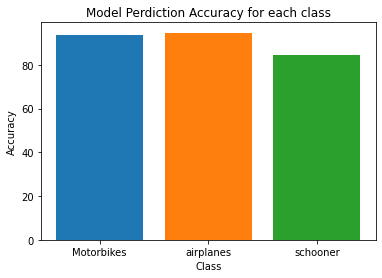

[epoch : 1, mini-batches :   100] loss: 0.959
[epoch : 2, mini-batches :   100] loss: 0.757
[epoch : 3, mini-batches :   100] loss: 0.748
[epoch : 4, mini-batches :   100] loss: 0.445
[epoch : 5, mini-batches :   100] loss: 0.385
Finished Training Model  2
Training Time for Model 2  : 82.85137057304382
Accuracy of the  2  Network on the validation images: 77 %
=============Plot graph for model  2 =============
Accuracy for class: Motorbikes is 64.7 %
Accuracy for class: airplanes is 99.3 %
Accuracy for class: schooner is 0.0 %


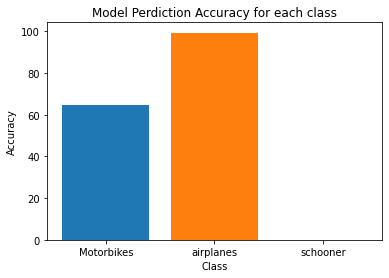

[epoch : 1, mini-batches :   100] loss: 1.111
[epoch : 2, mini-batches :   100] loss: 0.858
[epoch : 3, mini-batches :   100] loss: 0.843
[epoch : 4, mini-batches :   100] loss: 0.837
[epoch : 5, mini-batches :   100] loss: 0.846
Finished Training Model  3
Training Time for Model 3  : 341.8138356208801
Accuracy of the  3  Network on the validation images: 45 %
=============Plot graph for model  3 =============
Accuracy for class: Motorbikes is 0.0 %
Accuracy for class: airplanes is 100.0 %
Accuracy for class: schooner is 0.0 %


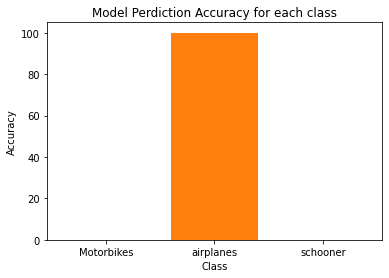

Model Accuracy Graph


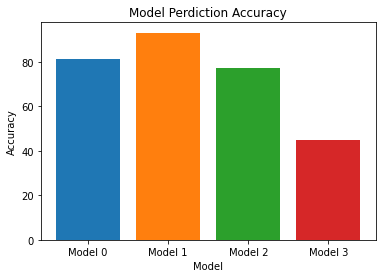

Model Run Time Graph


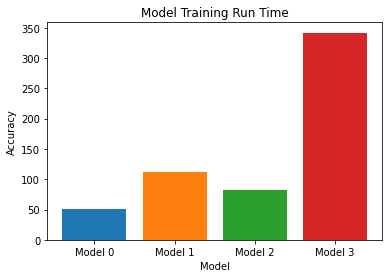

=============Iteration  1 =============
Augmentation Iteration 1 Image Augmentation parameters [Resize(size=(300, 300), interpolation=bilinear, max_size=None, antialias=None), GaussianBlur(kernel_size=(1, 1), sigma=(0.1, 0.5)), RandomRotation(degrees=[-5.0, 5.0], interpolation=nearest, expand=False, fill=0), RandomHorizontalFlip(p=0.5), ToTensor()]
Total Number of Images 1661
Total Number of Images in Training Dataset  1328
Total Number of Images in Validation Dataset  333
Dataset Information  Dataset ImageFolder
    Number of datapoints: 1661
    Root location: caltech101_classification
    StandardTransform
Transform: Compose(
               Resize(size=(300, 300), interpolation=bilinear, max_size=None, antialias=None)
               GaussianBlur(kernel_size=(1, 1), sigma=(0.1, 0.5))
               RandomRotation(degrees=[-5.0, 5.0], interpolation=nearest, expand=False, fill=0)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
torch.Size([10, 3, 300, 3

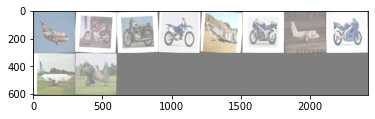

airplanes Motorbikes Motorbikes Motorbikes airplanes Motorbikes airplanes Motorbikes airplanes airplanes
[epoch : 1, mini-batches :   100] loss: 0.990
[epoch : 2, mini-batches :   100] loss: 0.545
[epoch : 3, mini-batches :   100] loss: 0.483
[epoch : 4, mini-batches :   100] loss: 0.446
[epoch : 5, mini-batches :   100] loss: 0.391
Finished Training Model  0
Training Time for Model 0  : 99.37663459777832
Accuracy of the  0  Network on the validation images: 83 %
=============Plot graph for model  0 =============
Accuracy for class: Motorbikes is 85.2 %
Accuracy for class: airplanes is 88.0 %
Accuracy for class: schooner is 0.0 %


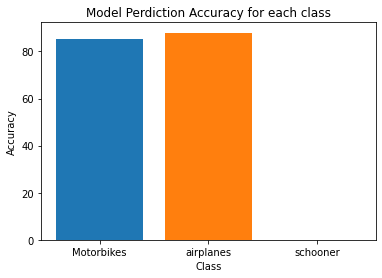

[epoch : 1, mini-batches :   100] loss: 0.892
[epoch : 2, mini-batches :   100] loss: 0.431
[epoch : 3, mini-batches :   100] loss: 0.343
[epoch : 4, mini-batches :   100] loss: 0.341
[epoch : 5, mini-batches :   100] loss: 0.238
Finished Training Model  1
Training Time for Model 1  : 205.12509989738464
Accuracy of the  1  Network on the validation images: 91 %
=============Plot graph for model  1 =============
Accuracy for class: Motorbikes is 95.7 %
Accuracy for class: airplanes is 88.0 %
Accuracy for class: schooner is 76.9 %


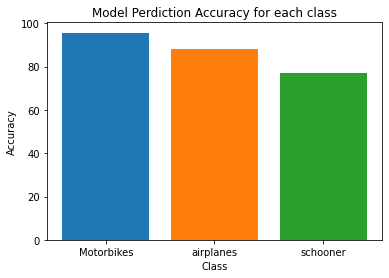

[epoch : 1, mini-batches :   100] loss: 0.942
[epoch : 2, mini-batches :   100] loss: 0.607
[epoch : 3, mini-batches :   100] loss: 0.474
[epoch : 4, mini-batches :   100] loss: 0.390
[epoch : 5, mini-batches :   100] loss: 0.370
Finished Training Model  2
Training Time for Model 2  : 146.3774766921997
Accuracy of the  2  Network on the validation images: 88 %
=============Plot graph for model  2 =============
Accuracy for class: Motorbikes is 92.6 %
Accuracy for class: airplanes is 91.8 %
Accuracy for class: schooner is 0.0 %


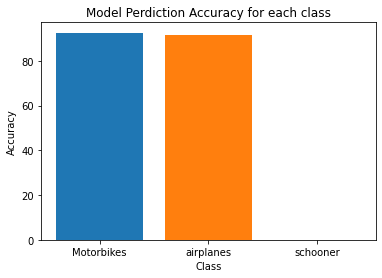

[epoch : 1, mini-batches :   100] loss: 1.217
[epoch : 2, mini-batches :   100] loss: 0.854
[epoch : 3, mini-batches :   100] loss: 0.853
[epoch : 4, mini-batches :   100] loss: 0.833
[epoch : 5, mini-batches :   100] loss: 0.839
Finished Training Model  3
Training Time for Model 3  : 400.72980976104736
Accuracy of the  3  Network on the validation images: 48 %
=============Plot graph for model  3 =============
Accuracy for class: Motorbikes is 100.0 %
Accuracy for class: airplanes is 0.0 %
Accuracy for class: schooner is 0.0 %


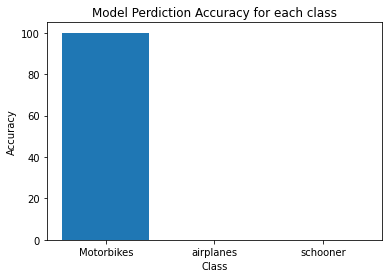

Model Accuracy Graph


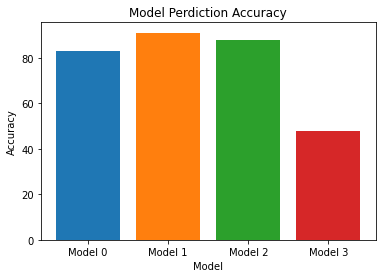

Model Run Time Graph


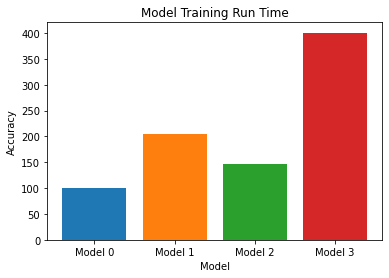

In [10]:
''' 
Custom code to load the data and apply various attributes like
augmentationList - Tranformation parameters of images,
learningRate - learning rate for optimizer
batch_size - batch size
epoch_val - no of epochs

Then pass these attributes to create_aug_dataset() to create dataset and to train_model() for training and validation of model 
Plot accuracy graph for each class along with model and training time graph for all the models
'''

import os
img_data_dir = 'caltech101_classification'
print("img_data_dir: ",img_data_dir)
print("Total Number of Images of different class:")
print("# of Airplane:",len(os.listdir(os.path.join(img_data_dir,'airplanes'))))
print("# of Motorbikes:",len(os.listdir(os.path.join(img_data_dir,'Motorbikes'))))
print("# of Schooner:",len(os.listdir(os.path.join(img_data_dir,'schooner'))))

batch_size = 10
epoch_val = 5
# sample 1: augmentationList = [transforms.Resize((300,300)),transforms.GaussianBlur(1,sigma=(0.1,0.5)),transforms.RandomRotation(5),transforms.RandomHorizontalFlip(),transforms.ToTensor()]
# sample 2: augmentationList = [Resize((240,240)),ToTensor()]
augmentationList = [[transforms.Resize((240,240)),ToTensor()],[transforms.Resize((300,300)),transforms.GaussianBlur(1,sigma=(0.1,0.5)),transforms.RandomRotation(5),transforms.RandomHorizontalFlip(),transforms.ToTensor()]]

#Take batch size from user
for auglist in range(len(augmentationList)):
  print("=============Iteration ",auglist,"=============")
  print("Augmentation Iteration",auglist,"Image Augmentation parameters",augmentationList[auglist])
  dataset = create_aug_dataset(img_data_dir,augmentationList[auglist])
  print("Total Number of Images",len(dataset))
  datasets = train_val_dataset(dataset)
  print("Total Number of Images in Training Dataset ",len(datasets['train']))
  print("Total Number of Images in Validation Dataset ",len(datasets['val']))
  print("Dataset Information ",datasets['train'].dataset)

  dataloaders = {x:DataLoader(datasets[x],batch_size, shuffle=True) for x in ['train','val']}
  x,y = next(iter(dataloaders['train']))
  print(x.shape, y.shape)

  classes = ('Motorbikes', 'airplanes', 'schooner')
  print(classes)

  accuracy_time_list= list()
  
  show_Training_info(dataloaders)
  nnList = [BaseNet(),Model1Net(),Model2Net(),Model3Net()]
  for n in range(len(nnList)):
    net = nnList[n]
    accuracy_time_list.append(train_model(n,"ADAM",0.001,epoch_val,net,dataloaders))
  plot_graph(accuracy_time_list)

img_data_dir:  caltech101_classification
Total Number of Images of different class:
# of Airplane: 800
# of Motorbikes: 798
# of Schooner: 63
=============Iteration  0 =============
Augmentation Iteration 0 Image Augmentation parameters [Resize(size=(120, 120), interpolation=bilinear, max_size=None, antialias=None), ToTensor()]
Total Number of Images 1661
Total Number of Images in Training Dataset  1328
Total Number of Images in Validation Dataset  333
Dataset Information  Dataset ImageFolder
    Number of datapoints: 1661
    Root location: caltech101_classification
    StandardTransform
Transform: Compose(
               Resize(size=(120, 120), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
           )
torch.Size([10, 3, 120, 120]) torch.Size([10])
('Motorbikes', 'airplanes', 'schooner')


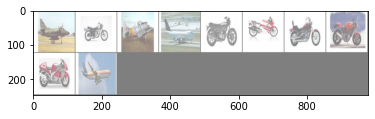

airplanes Motorbikes airplanes airplanes Motorbikes Motorbikes Motorbikes Motorbikes Motorbikes airplanes
[epoch : 1, mini-batches :   100] loss: 1.400
[epoch : 2, mini-batches :   100] loss: 0.785
[epoch : 3, mini-batches :   100] loss: 0.524
[epoch : 4, mini-batches :   100] loss: 0.495
[epoch : 5, mini-batches :   100] loss: 0.451
[epoch : 6, mini-batches :   100] loss: 0.441
[epoch : 7, mini-batches :   100] loss: 0.425
[epoch : 8, mini-batches :   100] loss: 0.379
[epoch : 9, mini-batches :   100] loss: 0.398
[epoch : 10, mini-batches :   100] loss: 0.376
Finished Training Model  0
Training Time for Model 0  : 50.83907961845398
Accuracy of the  0  Network on the validation images: 85 %
=============Plot graph for model  0 =============
Accuracy for class: Motorbikes is 83.4 %
Accuracy for class: airplanes is 93.7 %
Accuracy for class: schooner is 0.0 %


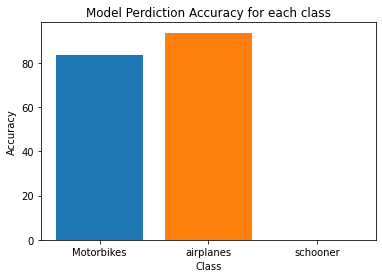

[epoch : 1, mini-batches :   100] loss: 1.129
[epoch : 2, mini-batches :   100] loss: 0.466
[epoch : 3, mini-batches :   100] loss: 0.367
[epoch : 4, mini-batches :   100] loss: 0.283
[epoch : 5, mini-batches :   100] loss: 0.263
[epoch : 6, mini-batches :   100] loss: 0.232
[epoch : 7, mini-batches :   100] loss: 0.190
[epoch : 8, mini-batches :   100] loss: 0.217
[epoch : 9, mini-batches :   100] loss: 0.185
[epoch : 10, mini-batches :   100] loss: 0.216
Finished Training Model  1
Training Time for Model 1  : 80.48970985412598
Accuracy of the  1  Network on the validation images: 93 %
=============Plot graph for model  1 =============
Accuracy for class: Motorbikes is 95.1 %
Accuracy for class: airplanes is 93.1 %
Accuracy for class: schooner is 81.8 %


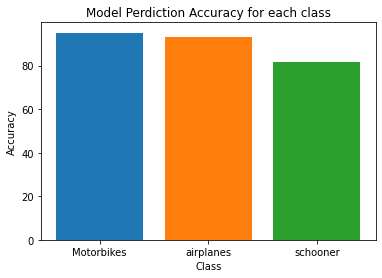

[epoch : 1, mini-batches :   100] loss: 1.604
[epoch : 2, mini-batches :   100] loss: 0.647
[epoch : 3, mini-batches :   100] loss: 0.820
[epoch : 4, mini-batches :   100] loss: 0.616
[epoch : 5, mini-batches :   100] loss: 0.867
[epoch : 6, mini-batches :   100] loss: 0.836
[epoch : 7, mini-batches :   100] loss: 0.842
[epoch : 8, mini-batches :   100] loss: 0.831
[epoch : 9, mini-batches :   100] loss: 0.840
[epoch : 10, mini-batches :   100] loss: 0.830
Finished Training Model  2
Training Time for Model 2  : 71.54951119422913
Accuracy of the  2  Network on the validation images: 47 %
=============Plot graph for model  2 =============
Accuracy for class: Motorbikes is 0.0 %
Accuracy for class: airplanes is 100.0 %
Accuracy for class: schooner is 0.0 %


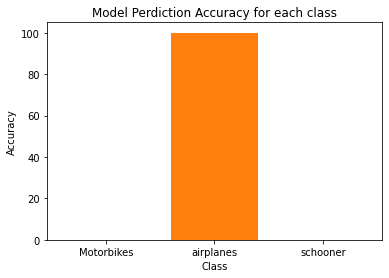

[epoch : 1, mini-batches :   100] loss: 1.568
[epoch : 2, mini-batches :   100] loss: 0.891
[epoch : 3, mini-batches :   100] loss: 0.841
[epoch : 4, mini-batches :   100] loss: 0.848
[epoch : 5, mini-batches :   100] loss: 0.843
[epoch : 6, mini-batches :   100] loss: 0.837
[epoch : 7, mini-batches :   100] loss: 0.847
[epoch : 8, mini-batches :   100] loss: 0.848
[epoch : 9, mini-batches :   100] loss: 0.855
[epoch : 10, mini-batches :   100] loss: 0.846
Finished Training Model  3
Training Time for Model 3  : 415.38547587394714
Accuracy of the  3  Network on the validation images: 47 %
=============Plot graph for model  3 =============
Accuracy for class: Motorbikes is 0.0 %
Accuracy for class: airplanes is 100.0 %
Accuracy for class: schooner is 0.0 %


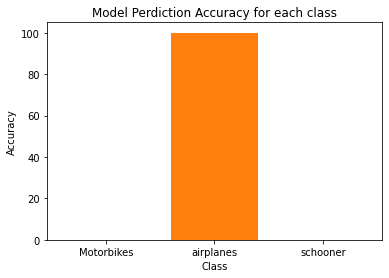

Model Accuracy Graph


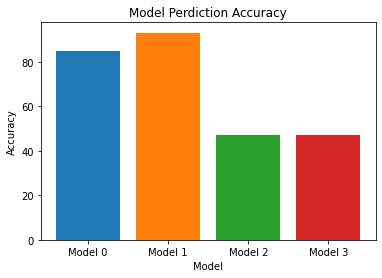

Model Run Time Graph


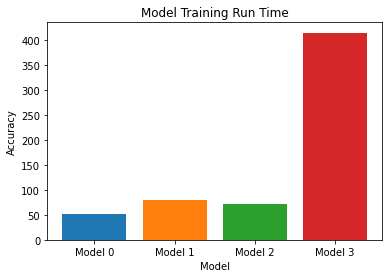

=============Iteration  1 =============
Augmentation Iteration 1 Image Augmentation parameters [Resize(size=(120, 120), interpolation=bilinear, max_size=None, antialias=None), GaussianBlur(kernel_size=(1, 1), sigma=(0.1, 0.5)), RandomRotation(degrees=[-30.0, 30.0], interpolation=nearest, expand=False, fill=0), RandomHorizontalFlip(p=0.5), RandomInvert(p=0.5), RandomAffine(degrees=[-10.0, 10.0]), RandomCrop(size=(10, 10), padding=None), ToTensor()]
Total Number of Images 1661
Total Number of Images in Training Dataset  1328
Total Number of Images in Validation Dataset  333
Dataset Information  Dataset ImageFolder
    Number of datapoints: 1661
    Root location: caltech101_classification
    StandardTransform
Transform: Compose(
               Resize(size=(120, 120), interpolation=bilinear, max_size=None, antialias=None)
               GaussianBlur(kernel_size=(1, 1), sigma=(0.1, 0.5))
               RandomRotation(degrees=[-30.0, 30.0], interpolation=nearest, expand=False, fill=0)
    

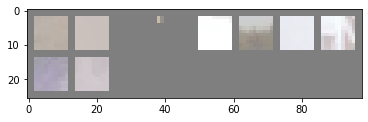

airplanes airplanes airplanes Motorbikes Motorbikes airplanes airplanes airplanes Motorbikes airplanes
[epoch : 1, mini-batches :   100] loss: 1.412
[epoch : 2, mini-batches :   100] loss: 0.862
[epoch : 3, mini-batches :   100] loss: 0.841
[epoch : 4, mini-batches :   100] loss: 0.834
[epoch : 5, mini-batches :   100] loss: 0.821
[epoch : 6, mini-batches :   100] loss: 0.827
[epoch : 7, mini-batches :   100] loss: 0.830
[epoch : 8, mini-batches :   100] loss: 0.835
[epoch : 9, mini-batches :   100] loss: 0.805
[epoch : 10, mini-batches :   100] loss: 0.782
Finished Training Model  0
Training Time for Model 0  : 59.49467611312866
Accuracy of the  0  Network on the validation images: 62 %
=============Plot graph for model  0 =============
Accuracy for class: Motorbikes is 69.8 %
Accuracy for class: airplanes is 70.8 %
Accuracy for class: schooner is 0.0 %


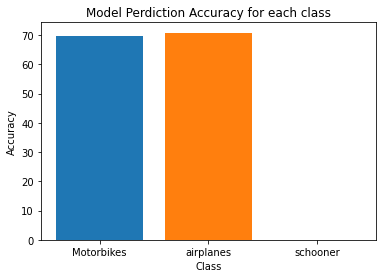

[epoch : 1, mini-batches :   100] loss: 1.200
[epoch : 2, mini-batches :   100] loss: 0.877
[epoch : 3, mini-batches :   100] loss: 0.854
[epoch : 4, mini-batches :   100] loss: 0.842
[epoch : 5, mini-batches :   100] loss: 0.838
[epoch : 6, mini-batches :   100] loss: 0.836
[epoch : 7, mini-batches :   100] loss: 0.815
[epoch : 8, mini-batches :   100] loss: 0.806
[epoch : 9, mini-batches :   100] loss: 0.818
[epoch : 10, mini-batches :   100] loss: 0.816
Finished Training Model  1
Training Time for Model 1  : 61.59731984138489
Accuracy of the  1  Network on the validation images: 59 %
=============Plot graph for model  1 =============
Accuracy for class: Motorbikes is 41.5 %
Accuracy for class: airplanes is 88.8 %
Accuracy for class: schooner is 0.0 %


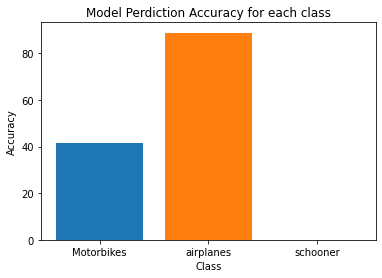

[epoch : 1, mini-batches :   100] loss: 1.504
[epoch : 2, mini-batches :   100] loss: 0.828
[epoch : 3, mini-batches :   100] loss: 0.861
[epoch : 4, mini-batches :   100] loss: 0.845
[epoch : 5, mini-batches :   100] loss: 0.858
[epoch : 6, mini-batches :   100] loss: 0.845
[epoch : 7, mini-batches :   100] loss: 0.834
[epoch : 8, mini-batches :   100] loss: 0.848
[epoch : 9, mini-batches :   100] loss: 0.847
[epoch : 10, mini-batches :   100] loss: 0.846
Finished Training Model  2
Training Time for Model 2  : 68.9634017944336
Accuracy of the  2  Network on the validation images: 48 %
=============Plot graph for model  2 =============
Accuracy for class: Motorbikes is 0.0 %
Accuracy for class: airplanes is 100.0 %
Accuracy for class: schooner is 0.0 %


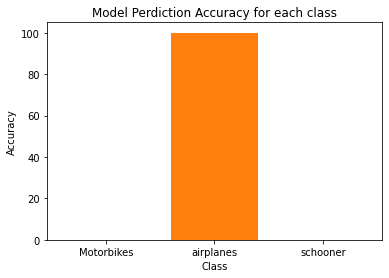

[epoch : 1, mini-batches :   100] loss: 1.560
[epoch : 2, mini-batches :   100] loss: 0.868
[epoch : 3, mini-batches :   100] loss: 0.861
[epoch : 4, mini-batches :   100] loss: 0.833
[epoch : 5, mini-batches :   100] loss: 0.840
[epoch : 6, mini-batches :   100] loss: 0.818
[epoch : 7, mini-batches :   100] loss: 0.832
[epoch : 8, mini-batches :   100] loss: 0.830
[epoch : 9, mini-batches :   100] loss: 0.845
[epoch : 10, mini-batches :   100] loss: 0.829
Finished Training Model  3
Training Time for Model 3  : 401.3743345737457
Accuracy of the  3  Network on the validation images: 47 %
=============Plot graph for model  3 =============
Accuracy for class: Motorbikes is 100.0 %
Accuracy for class: airplanes is 0.0 %
Accuracy for class: schooner is 0.0 %


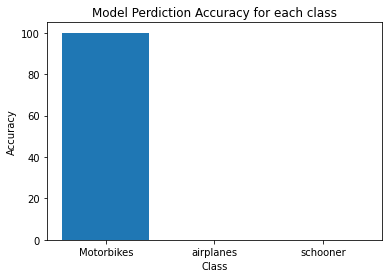

Model Accuracy Graph


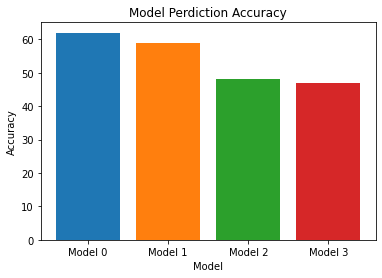

Model Run Time Graph


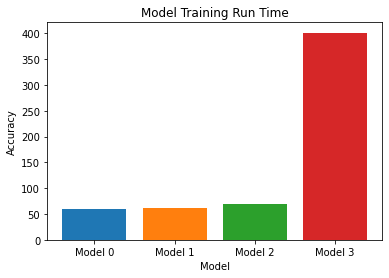

In [15]:
''' 
Custom code to load the data and apply various attributes like
augmentationList - Tranformation parameters of images,
learningRate - learning rate for optimizer
batch_size - batch size
epoch_val - no of epochs

Then pass these attributes to create_aug_dataset() to create dataset and to train_model() for training and validation of model 
Plot accuracy graph for each class along with model and training time graph for all the models
'''
import os
img_data_dir = 'caltech101_classification'
print("img_data_dir: ",img_data_dir)
print("Total Number of Images of different class:")
print("# of Airplane:",len(os.listdir(os.path.join(img_data_dir,'airplanes'))))
print("# of Motorbikes:",len(os.listdir(os.path.join(img_data_dir,'Motorbikes'))))
print("# of Schooner:",len(os.listdir(os.path.join(img_data_dir,'schooner'))))

batch_size = 10
epoch_val = 10
# sample 1: augmentationList = [transforms.Resize((300,300)),transforms.GaussianBlur(1,sigma=(0.1,0.5)),transforms.RandomRotation(5),transforms.RandomHorizontalFlip(),transforms.ToTensor()]
# sample 2: augmentationList = [Resize((240,240)),ToTensor()]
augmentationList = [[transforms.Resize((120,120)),ToTensor()],[transforms.Resize((120,120)),transforms.GaussianBlur(1,sigma=(0.1,0.5)),transforms.RandomRotation(30),transforms.RandomHorizontalFlip(),transforms.RandomInvert(),transforms.RandomAffine(10),transforms.RandomCrop((10,10)),transforms.ToTensor()]]

#Take batch size from user
for auglist in range(len(augmentationList)):
  print("=============Iteration ",auglist,"=============")
  print("Augmentation Iteration",auglist,"Image Augmentation parameters",augmentationList[auglist])
  dataset = create_aug_dataset(img_data_dir,augmentationList[auglist])
  print("Total Number of Images",len(dataset))
  datasets = train_val_dataset(dataset)
  print("Total Number of Images in Training Dataset ",len(datasets['train']))
  print("Total Number of Images in Validation Dataset ",len(datasets['val']))
  print("Dataset Information ",datasets['train'].dataset)

  dataloaders = {x:DataLoader(datasets[x],batch_size, shuffle=True) for x in ['train','val']}
  x,y = next(iter(dataloaders['train']))
  print(x.shape, y.shape)

  classes = ('Motorbikes', 'airplanes', 'schooner')
  print(classes)

  accuracy_time_list= list()
  
  show_Training_info(dataloaders)
  nnList = [BaseNet(),Model1Net(),Model2Net(),Model3Net()]
  for n in range(len(nnList)):
    net = nnList[n]
    accuracy_time_list.append(train_model(n,"SGD",0.005,epoch_val,net,dataloaders))
  plot_graph(accuracy_time_list)